# 중고차 데이터셋 전처리하기
오늘 우리에게 주어진 데이터는 중고차에 대한 정보들을 담고 있습니다. 최종 목표는 특정 정보들이 주어졌을 때 중고차 가격을 예측하는 모델을 만드는 것입니다. 

오늘은 데이터 분석이나 모델을 만들기 전에 주어진 데이터셋을 모델링이나 분석에 적절하게 전처리하는 작업을 수행합니다.

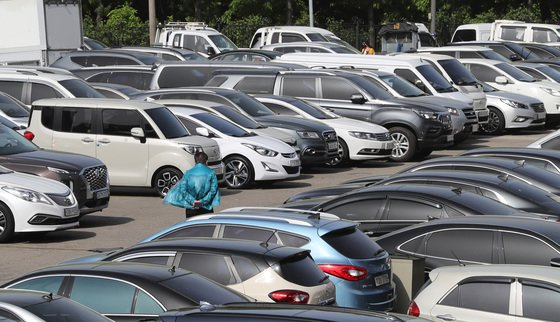

📌 전처리 과정
1. 데이터 셋 확인
2. 결측값 처리
3. 이상치 처리
4. 변수 가공 (피처 엔지니어링)

In [106]:
import warnings
warnings.filterwarnings(action='ignore')

In [107]:
filename = "auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# `1단계` 데이터 셋 확인

[ 참고 ]
1. csv 파일 불러오기 (pandas 함수)
~~~
read_csv('파일 경로', names=[컬럼 리스트])
- names: 데이터프레임의 열(컬럼) 이름을 지정 (CSV 파일에 열 이름이 포함되어 있지 않을 때 사용)
~~~
2. 데이터프레임 요약 정보 보기
~~~
데이터프레임.info()
~~~
3. 컬럼별 결측치 개수 확인
~~~
데이터프레임.isnull().sum()
~~~
4. 상위 n개의 열 반환
~~~
데이터프레임.head(n)
~~~
5. 값 대체
~~~
데이터프레임.replace('바꿔질 값', '바꾼 자리에 들어갈 값', inplace=True/False)
~~~
6. 결측치: numpy에서 nan 결측치를 제공합니다.

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [104]:
# pandas 라이브러리를 pd라는 별칭으로, numpy 라이브러리를 np라는 별칭으로, seaborn 라이브러리를 sns라는 별칭으로, matplotlib.pylab를 plt이라는 별칭으로 import 해주세요.
import pandas as pd
import numpy as np
# df라는 변수에 중고차 데이터셋을 불러와주세요. 중고차 데이터셋의 이름은 filename 변수에, 지정할 컬럼 리스트는 headers 변수에 정의되어 있습니다.
import os
os.getcwd
df = pd.read_csv('C:\\Users\\이주성\\insight-12th\\code\\js22211\\session2\\auto.csv', names=headers)

In [85]:
# 아래와 같이 데이터 프레임의 요약 정보를 확인하는 코드를 작성하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

데이터 분석에서 각 피처의 의미를 파악하는 것은 매우 중요합니다.

[ 변수 정의 ] 

- symboling: 차량의 보험 리스크를 나타내는 등급
- normalized-losses: 정규화된 손실액, 차량당 평균 손실액
- make: 자동차 제조사
- fuel-type: 연료 유형 (가솔린 또는 디젤)
- aspiration: 터보 여부 (없음 또는 터보)
- num-of-doors: 문의 개수
- body-style: 차체 스타일 (세단, 해치백 등)
- drive-wheels: 구동 휠 (전륜구동, 후륜구동, 4륜구동)
- engine-location: 엔진 위치 (앞 또는 뒤)
- wheel-base: 바퀴베이스, 앞뒤 바퀴 사이의 거리
- length, width, height: 차량의 길이, 너비, 높이
- curb-weight: 차량의 고정중량
- engine-type: 엔진 타입
- num-of-cylinders: 실린더의 개수
- engine-size: 엔진 크기
- fuel-system: 연료 시스템
- bore, stroke: 엔진의 보어 지름과 스트로크
- compression-ratio: 압축 비율
- horsepower: 마력
- peak-rpm: 최대 엔진 회전 속도
- city-mpg, highway-mpg: 도시 및 고속도로 연비
- price: 중고차 가격

In [86]:
# 아래와 같이 컬럼별 결측치의 개수를 확인하는 코드를 작성하세요.
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

결측치가 존재하지 않는 것으로 보입니다.

In [87]:
# 아래와 같이 데이터프레임의 상위 10개의 열을 확인하는 코드를 작성하세요.
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


결측치가 존재하지 않는 줄 알았는데, NaN 대신 ?라는 값으로 결측치가 표현되어 있음을 확인할 수 있습니다.

따라서 ?를 결측치(=NaN)으로 대체해줍니다.

In [88]:
# df에서 ?를 결측치(np.nan)로 대체해주세요. inplace는 True로 합니다.
df.replace({'?':np.nan},inplace = True)

In [89]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


?를 결측값으로 바꾸었으니, 다시 컬럼별 결측값의 개수를 확인합니다.

In [90]:
# 아래와 같이 컬럼별 결측값의 개수를 확인하는 코드를 작성하세요.
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

특정 컬럼들에 결측값이 존재함을 확인할 수 있습니다.

# `2단계` 결측값 처리
위에서 확인한 결측값들은 데이터 분석이나 모델링에서 왜곡을 야기할 수 있으므로, 적절하게 처리해주어야 합니다.

📌 결측값 처리 방법
1. 삭제
2. 대체
    1) 일괄 대체
    2) 유사 유형 대체

## 삭제
위에서 확인한 컬림별 결측값의 개수에서 결측값의 개수가 적은 컬럼의 경우, 행 삭제를 통해 결측값을 처리해보겠습니다.

삭제를 통해 결측값을 처리할 컬럼은 다음과 같습니다.
- horsepower (마력)
- stroke (스트로크)

[ 참고 ] 행 삭제
***
DataFrame.dropna(axis=0/1, how='any'/'all', subset=[col1, col2, ...], inplace=True/False)
***
- axis = 0/1 or 'index'/'columns'\
 0 or 'index' -> NaN 값이 포함된 row를 drop (default 값입니다.) \
 1 or 'columns' -> NaN 값이 포함된 column을 drop \
  
- how = 'any'/'all' \
any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.) \
all -> row 또는 column에 있는 모든 값이 NaN이어야 drop \

- inplace = True/False \
True -> dropna가 적용된 DataFrame 자체에 dropna를 적용\
False -> dropna가 적용된 DataFrame는 그대로 두고 dropna를 적용한 DataFrame을 return\
 
- subset = [col1, col2, ...] \
subset을 명시하지 않으면 DataFrame 전체(모든 column & 모든 row)에 대해 dropna를 진행 \
subset을 명시하면 subset에 적힌 column값에 대해서만 dropna를 진행 |

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [91]:
# horsepower와 stroke 컬럼에서 결측값이 있는 행을 삭제해주세요.
# 컬럼에 NaN 값이 1개만 있어도 drop하며, inplace는 True로 합니다.
df.dropna(axis=0,how='any',subset=['horsepower','stroke'],inplace=True)
# 결측값이 있는 행을 삭제하므로 axis = 0으로 설

In [92]:
df.reset_index(drop=True, inplace=True) # 인덱스 초기화
df.isnull().sum()

symboling             0
normalized-losses    39
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## 대체

- 결측값이 발생한 경우 다른 관측치의 **평균, 최빈값, 중간값** 등으로 대체할 수 있습니다.<br><br>
1) 모든 관측치의 평균값 등으로 대체하는 **일괄 대체 방법**<br>
2) 범주형 변수를 활용해 유사한 유형의 평균값 등으로 대체하는 **유사 유형 대체 방법**이 있습니다. 
   - (예 – 남자 키의 평균 값 173, 여자 키의 평균 값 158인 경우, 남자 관측치의 결측 값은 173, 여자 관측치의 결측값은 158으로 대체)<br><br>
- 결측값의 발생이 다른 변수와 관계가 있는 경우 대체 방법이 유용한 측면은 있지만, 유사 유형 대체 방법의 경우 어떤 범주형 변수를 유사한 유형으로 선택할 것인지는 자의적으로 선택하므로 모델이 왜곡될 가능성이 존재합니다.\\
<br><br>

결측값이 많은 컬럼의 경우 일괄 대체 통해 전처리하고 다른 경우에는 유사 유형 대체로 전처리를 하겠습니다.

### 일괄 대체 (평균값)
'normalized-losses(차량당 평균 손실액)' 컬럼을 평균값으로 대체하도록 하겠습니다.

In [93]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 199 entries, 0 to 198
Series name: normalized-losses
Non-Null Count  Dtype 
--------------  ----- 
160 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


info() 함수를 통해서 'normalized-losses' 컬럼의 정보를 확인해보았을 때, 데이터타입이 object임을 확인할 수 있습니다.

데이터타입이 object인 경우에는 평균값을 계산할 수 없으므로, 해당 컬럼의 데이터타입을 float로 바꿔주어야 합니다.

[ 참고 ]
1. 데이터타입 변경
~~~
.astype("데이터타입")
~~~
     : Series의 데이터 타입을 변경합니다.
2. 평균값 계산
~~~
.mean()
~~~
    : 변환된 Series의 평균값을 계산합니다.
3. 결측값 채우기
~~~
fillna(특정 값)
~~~
    결측값(null 또는 NaN)을 특정 값으로 채우는 메소드입니다.
    
위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [94]:
# 'normalized-losses'컬럼을 float 타입으로 바꾼 Series의 평균을 avg_norm_loss 변수에 저장하세요.

avg_norm_loss= df['normalized-losses'].astype(float).mean()

# 'normalized-losses' 컬럼의 결측치를 avg_norm_loss로 채우고, 'normalized-losses' 컬럼에 저장(업데이트)하세요.

df['normalized-losses']=df['normalized-losses'].fillna(avg_norm_loss)

In [95]:
print(f'대체한 평균값은: {avg_norm_loss} 입니다')
print(f"결측값의 개수는: {df['normalized-losses'].isnull().sum()}개 입니다.")

대체한 평균값은: 121.3 입니다
결측값의 개수는: 0개 입니다.


'normalized-losses' 컬럼의 결측값이 해당 컬럼의 평균값인 121.3으로 대체되었음을 확인할 수 있습니다.

### 일괄 대체 (최빈값)
'num-of-doors(문의 개수)' 컬럼을 최빈값으로 대체하도록 하겠습니다.

[ 참고 ]
1. 특정 컬럼의 최빈값 확인
~~~
컬럼.mode().value_counts().idxmax()
~~~

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [96]:
# mode_num_doors 변수에 해당 'num-of-doors' 컬럼의 최빈값을 저장해주세요.
mode_num_doors=df['num-of-doors'].mode().value_counts().idxmax(

# 'num-of-doors' 컬럼의 결측값을 'num-of-doors' 컬럼의 최빈값으로 채우고, 'num-of-doors' 컬럼에 업데이트(저장) 해주세요.
df['num-of-doors']=df['num-of-doors'].fillna(mode_num_doors)

In [71]:
print(f'대체한 최빈값은: {mode_num_doors} 입니다')
print(f"결측값의 개수는: {df['num-of-doors'].isnull().sum()}개 입니다.")

대체한 최빈값은: four 입니다
결측값의 개수는: 0개 입니다.


'normalized-losses' 컬럼의 결측값이 해당 컬럼의 최빈값인 'four'으로 대체되었음을 확인할 수 있습니다.

### 유사 유형 대체
'price(가격)' 컬럼에는 결측치가 4개 존재합니다.

각 결측치를 make(자동차 제조사) 별 price의 평균으로 대체하겠습니다.

In [97]:
check_index = df[df['price'].isnull()].index
df[['make','price']].loc[check_index]

,make,price
9,audi,NaN
44,isuzu,NaN
45,isuzu,NaN
125,porsche,NaN


결측값이 존재하는 행을 확인해보면, 총 3개의 자동차 제조사가 있음을 확인할 수 있습니다. 

자동차 회사인 audi, isuzu, porsche 별로 각각 가격의 평균을 구해 결측값을 채우도록 하겠습니다.

In [63]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 199 entries, 0 to 198
Series name: price
Non-Null Count  Dtype  
--------------  -----  
199 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [64]:
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
194    16845.0
195    19045.0
196    21485.0
197    22470.0
198    22625.0
Name: price, Length: 199, dtype: float64

'normalized-losses' 컬럼과 마찬가지로 데이터타입이 object이기 때문에, 데이터타입을 float로 바꿔주어야 합니다.

[ 참고 ]
~~~
데이터프레임.groupby("컬럼명")
~~~
: 이 함수는 DataFrame을 "컬럼명" 열을 기준으로 그룹화합니다.
~~~
.transform("mean")
~~~
: 평균값을 계산하고 해당 값을 모든 행에 적용합니다..
    
위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [98]:
# price 컬럼을 float 타입으로 바꾸고, price 컬럼에 저장해주세요.
df['price']=df['price'].astype(float)

# 데이터프레임을 'make' 컬럼을 기준으로 그룹화하고, 그룹화된 데이터프레임에서 price의 평균값을 계산하고 모든 행에 적용하세요.
# 또한, 그렇게 도출한 제조사별 평균 가격 열을 df_make_avg라는 변수에 저장하세요.
df_make_avg= df.groupby('make')['price'].transform('mean')

# 'price' 컬럼의 결측값을 제조사별 평균 가격(df_make_avg)으로 채우고, 'price' 컬럼에 업데이트(저장) 해주세요.
df['price']=df['price'].fillna(df_make_avg)


In [99]:
display(df[['make','price']].loc[check_index])

,make,price
9,audi,17859.166667
44,isuzu,8916.500000
45,isuzu,8916.500000
125,porsche,31400.500000


기존의 결측값이 제조사별 평균 가격으로 대체되었음을 확인할 수 있습니다.

# `3단계` 이상치 처리
**이상치**란 기존 데이터들과 거리가 먼 데이터입니다.
- 예를 들어, 이런값들이(234,234, 267, 1, 200, 245, 300, 199, 250, 8999, 245)이 세트로 주어졌다고 하면, 이 1과 8999는 **이상치(outlier)** 라고 할 수 있습니다.

적은 수의 이상치가 데이터 분석 결과에 큰 영향을 끼쳐 데이터 분석이나 모델링에 왜곡을 일으킬 수 있으므로, 적절하게 처리해주어야 합니다. 

## 이상치 확인
1. df.describe() 
2. BoxPlot (시각화)
3. Z-score
4. Tukey Fences

### 데이터프레임.describe()
- describe 함수: 데이터의 개수(count), 평균(mean), 표준편차(std), 분위수(25,50,75%), 최대최소(max,min)를 보여줌
- 기본 수치 기술통계량 확인 가능 

In [108]:
df.describe()

import matplotlib.pyplot as plt

데이터프레임의 기본적인 기술통계량을 확인함으로써 이상치를 확인할 수 있습니다.

### BoxPlot (시각화)
시각적으로 이상치를 확인할 수 있습니다. 

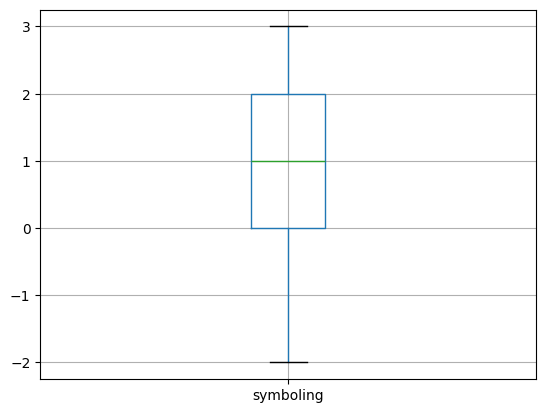

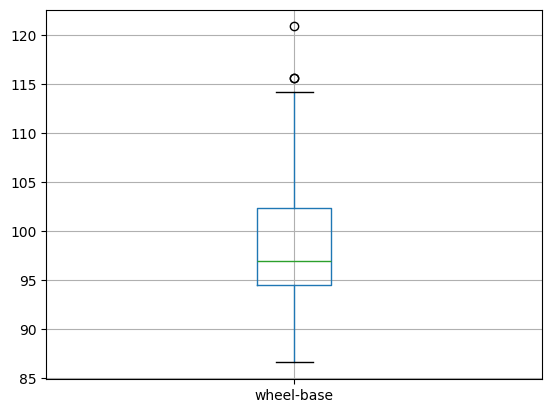

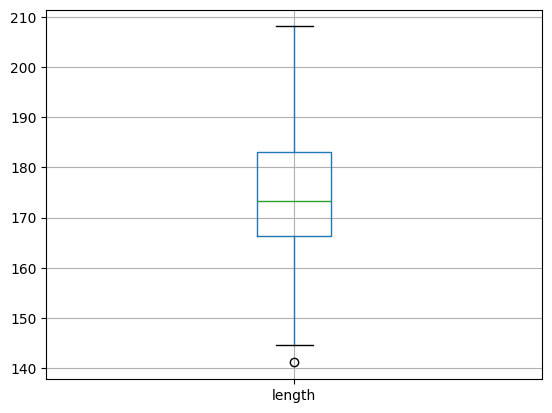

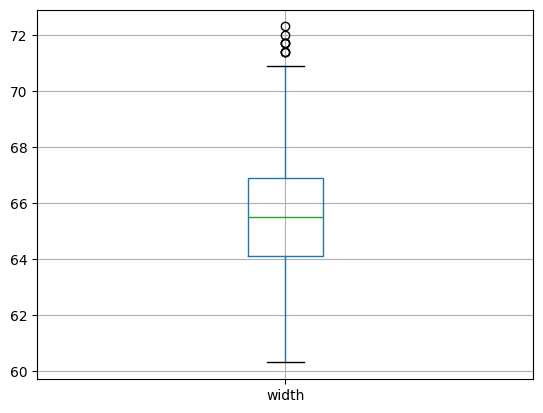

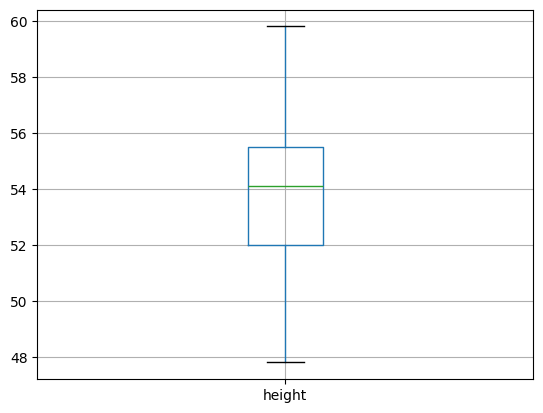

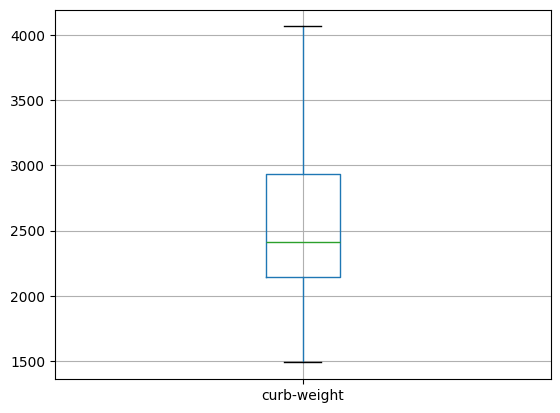

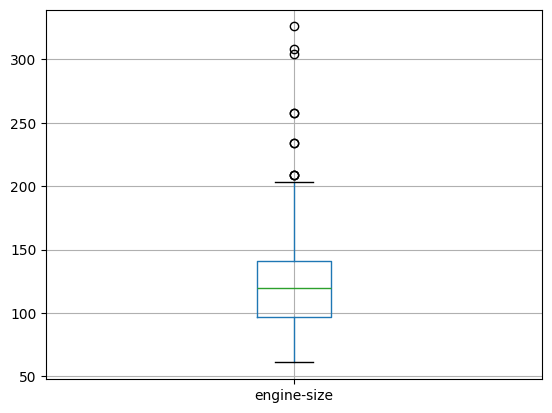

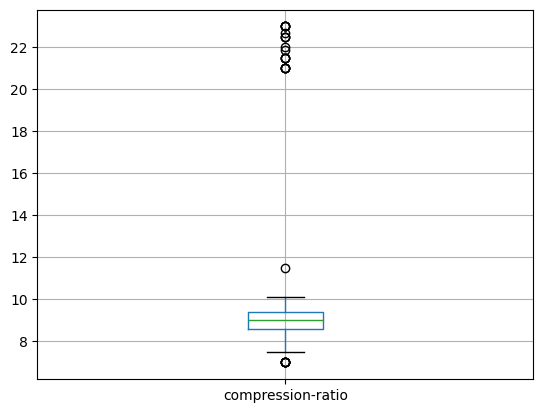

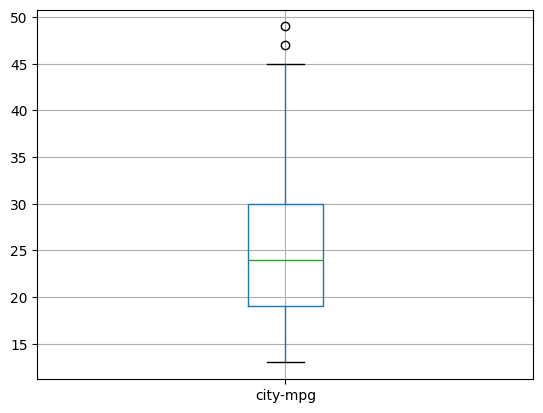

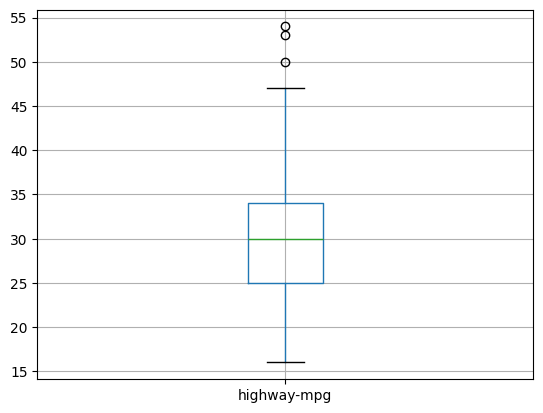

In [109]:
for i in df.describe().columns:
    df[[i]].boxplot()
    plt.show()

### Z-score
데이터의 Z-score 는 해당 데이터가 평균으로부터 얼마의 표준 편차만큼 벗어나 있는지를 의미합니다. 예를 들어 3 표준 편차 만큼을 벗어나는 데이터를 이상치로 처리하는 것은 Z-score 가 3 보다 크고 -3 보다 작은 데이터를 이상치로 처리하는 것과 같은 작업입니다.

아래는 Z-score를 기준으로 이상치 리스트를 반환하는 함수입니다.

In [24]:
def find_outlier_z(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_score = [(y-mean)/std for y in data] #표준화

    masks = np.where(np.abs(z_score)>threshold)
    
    return masks

'compression-ratio' 컬럼에 대해서, 이상치를 찾아보도록 하겠습니다.

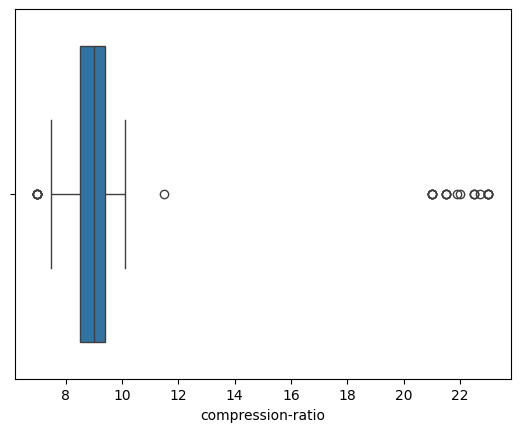

find_outlier_ze() 함수가 찾은 이상치 리스트: (array([ 59, 152, 153, 168, 176, 178, 181, 186, 197], dtype=int64),)


In [25]:
sns.boxplot(x=df["compression-ratio"])
plt.show()

print(f"find_outlier_ze() 함수가 찾은 이상치 리스트: {find_outlier_z(df['compression-ratio'])}")

위에서 확인할 수 있는 것처럼, 시각적으로도 이상치로 보이는 값들이 find_outlier_z 함수에 의해 리스트로 구해졌습니다.

### Tukey Fences
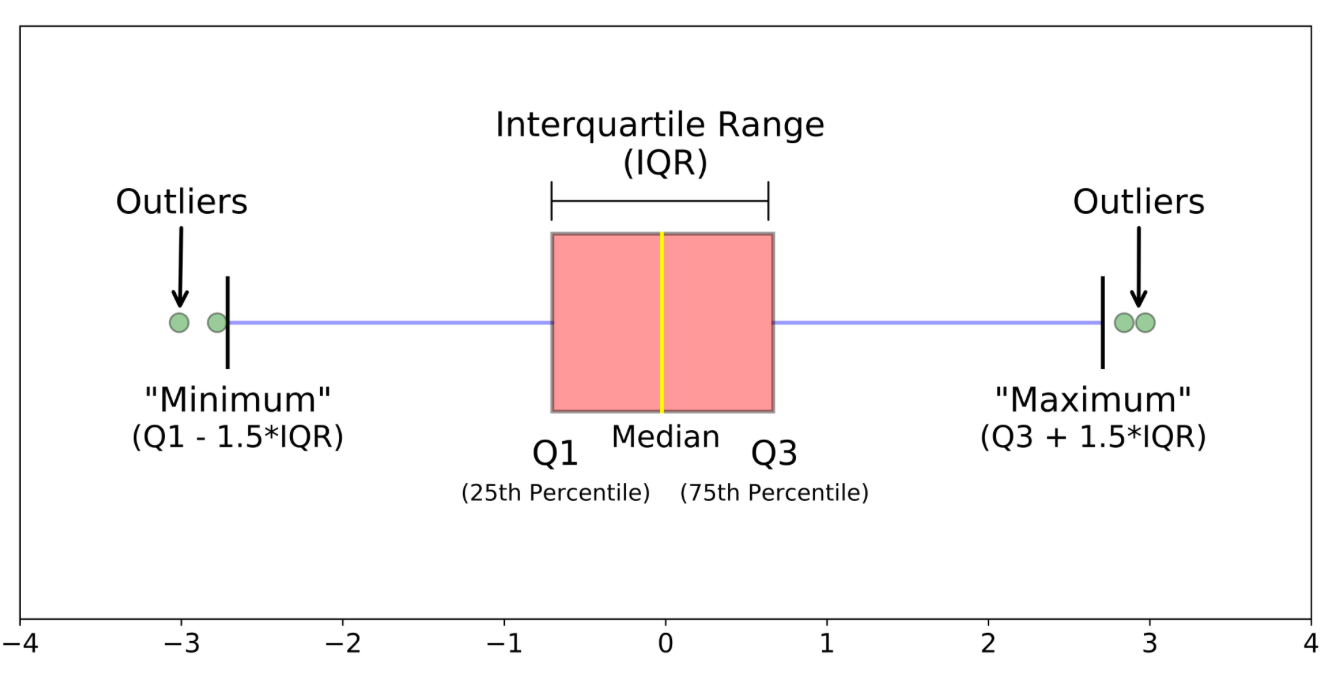

Tukey Fences(튜키 펜스)는 이상치를 식별하는 통계적인 방법 중 하나로, 데이터의 사분위 범위(IQR, Interquartile Range)를 기반으로 합니다. IQR은 데이터의 중간 50% 범위를 측정하며, 이는 데이터의 상위 25%와 하위 25%를 제외한 중간 범위를 의미합니다.

(Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터는 이상치로 처리합니다. 1.5 보다 큰 3 혹은 그 이상의 값을 곱하기도 하며 값이 클수록 더욱 최극단의 이상치를 처리함을 알 수 있습니다.

아래는 Tukey Fances를 기준으로 이상치 리스트를 반환하는 함수입니다.

In [26]:
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다.\n')
    
    # np.where은 데이터의 인덱스를 반환
    mask = np.where((data>upper_bound) | (data<lower_bound)) 
    
    # np.where을 Dataframe.index로 바꿔서 쓸 수도 있다
    #mask = data[(data['feature'] > upper_bound) | (data['feature'] < lower_bound)].index
    return mask

'compression-ratio' 컬럼에 대해서, 이상치를 찾아보도록 하겠습니다.

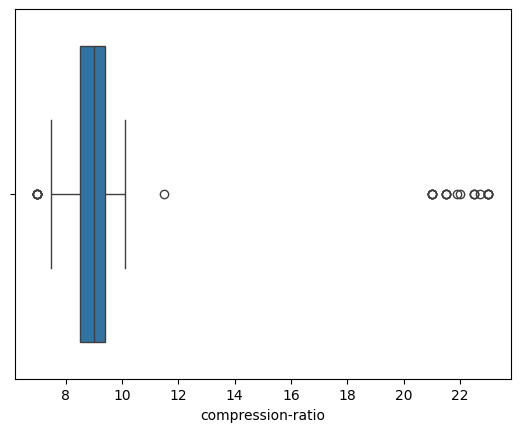

lower_bound는 7.15, upper_bound는 10.75 입니다.

find_outlier_by_Tukey() 함수가 찾은 이상치 리스트: (array([  9,  29,  49,  59,  62,  63,  64,  65,  66,  78,  79,  80,  86,
       104, 106, 108, 110, 112, 113, 120, 152, 153, 168, 176, 178, 181,
       186, 197], dtype=int64),)


In [27]:
sns.boxplot(x=df["compression-ratio"])
plt.show()

print(f"find_outlier_by_Tukey() 함수가 찾은 이상치 리스트: {find_outlier_by_Tukey(df['compression-ratio'])}")

## 이상치 처리
이상치 처리에는 다음과 같은 방법들이 있습니다.
1. ***단순 삭제***

- 이상값이 **Human error**에 의해서 발생한 경우에는 해당 관측치를 **삭제**하면 됩니다. <br>
- 단순 오타나, 주관식 설문 등의 비현실적인 응답, 데이터 처리 과정에서의 오류 등의 경우에 사용합니다.ex) 나이가 255세
> 이상치 데이터 제거하기 (이상치가 아닌 데이터만 채택하기) \
> 결측치 삭제와 유사

2. ***다른 값으로 대체***

- 절대적인 관측치의 **숫자가 작은 경우**, 단순삭제를 통해 이상치를 제거하면 관측치의 절대량이 작아지는 문제가 발생합니다.<br>
- 이런 경우 이상값이 Human error에 의해 발생했더라도 관측치를 삭제하는 대신 다른 값(평균 등)으로 **대체**하거나, 결측값과 유사하게 다른 변수들을 사용해서 예측 모델을 만들고, 이상값을 **예측**한 후 해당 값으로 대체하는 방법도 사용할 수 있습니다.
- valu modification: 하한값과 상한값을 결정한 후 하한값보다 적으면 하한값으로 대체하고 상한값보다 크면 상한값으로 대체하는 관측값 변경
- weight modification: 이상치의 영향을 감소시키는 가중치 조정

3. ***변수화***
- 이상값이 **자연 발생**한 경우, 단순 삭제나 대체의 방법을 통해 수립된 모델은 설명/예측하고자 하는 현상을 잘 설명하지 못할 수도 있습니다. 
    - 예를 들어, 아래 그래프에서 다른 관측치들만 보면 경력과 연봉이 비례하는 현상이 존재하는 것 처럼 보이지만, 5년차의 연봉 $35,000인 이상치가 포함됨으로써 모델의 설명력이 크게 낮아 집니다. <br><br>    
- 자연발생적인 이상값의 경우, 바로 삭제하지 말고 좀 더 찬찬히 이상값에 대해 **파악**하는 것이 중요합니다.
    - 예를 들어, 위 이상값의 경우 의사 등 전문직종에 종사하는 사람이라고 가정해 봅시다. 이럴 경우 전문직종 종사 여부를 Yes – No로 변수화 하면 이상값을 삭제하지 않고 모델에 포함시킬 수 있습니다.

4. ***리샘플링***
    - 자연발생한 이상값을 처리하는 또 다른 방법으로는 해당 **이상값을 분리**해서 모델을 만드는 방법이 있습니다.
        - 아래와 같이 15년 이상의 경력을 가진 이상값이 존재한다고 가정해 봅시다. 이 관측치는 경력은 길지만 연봉이 비례해서 늘어나지 않은 사람입니다. (위 사례와의 차이: 위 사례는 설명 변수, 즉 경력 측면에서는 Outlier가 아니고, 종속 변수인 연봉만 예측치를 벗어나는 반면, 본 케이스는 설명 변수, 종속 변수 모두에서 Outlier라는 점입니다.)
        
📌 ***로그 변환***
- 로그 변환이란 데이터의 값을 로그 함수를 적용하여 변환하는 것을 의미합니다. 로그 변환은 데이터의 스케일을 조정하고, 이상치의 영향을 줄이며, 정규성을 향상시키는 데 도움을 줄 수 있습니다.

로그 변환 전


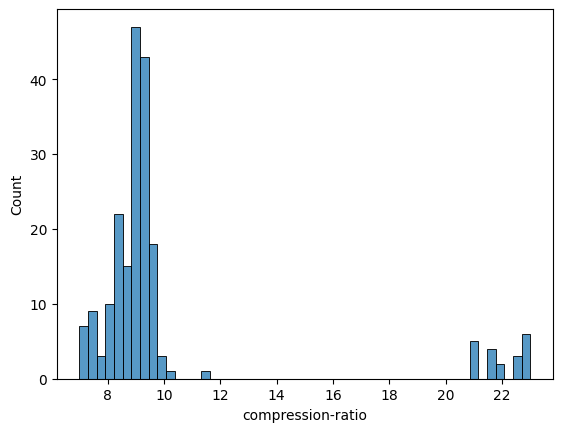

In [28]:
print("로그 변환 전")
sns.histplot(x=df["compression-ratio"])
plt.show()

로그 변환 후


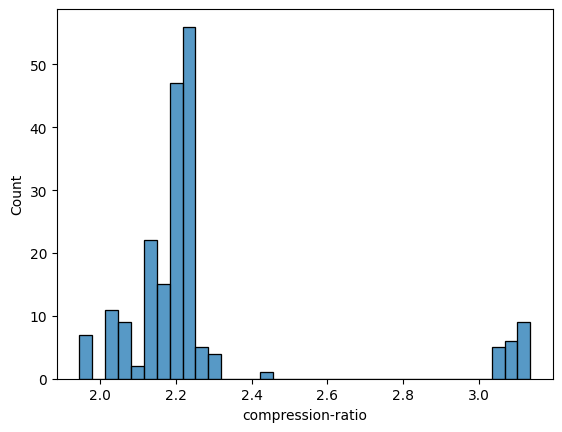

In [29]:
print("로그 변환 후")
sns.histplot(x=np.log(df["compression-ratio"]))
plt.show()

## 이상치 확인과 삭제 예시
4.1.4에서 Turkey Fence로 이상치를 반환하는 함수를 확인했었습니다.

이 함수로 'compression-ratio' 컬럼의 이상치를 반환하고, 해당 이상치에 해당하는 행을 삭제하는 작업을 수행해보겠습니다.

이상치에 해당하는 행 삭제 전


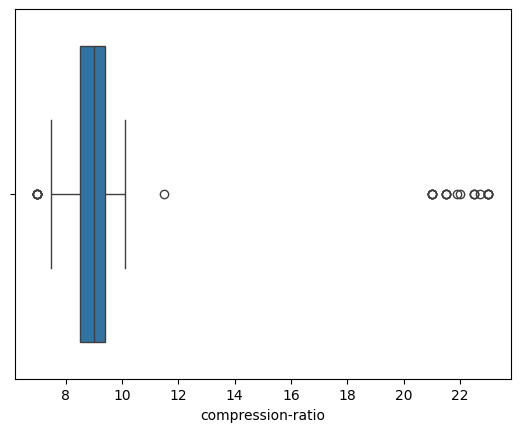

lower_bound는 7.15, upper_bound는 10.75 입니다.

이상치에 해당하는 행 삭제 후


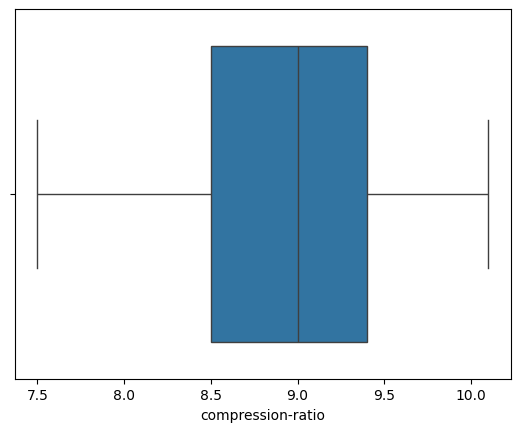

In [30]:
# 이상치 확인 함수 (Turkey Fence)
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다.\n')
    
    # np.where은 데이터의 인덱스를 반환
    mask = np.where((data>upper_bound) | (data<lower_bound)) 
    
    # np.where을 Dataframe.index로 바꿔서 쓸 수도 있다
    #mask = data[(data['feature'] > upper_bound) | (data['feature'] < lower_bound)].index
    return mask

# 이상치 처리 전 데이터 시각화
print("이상치에 해당하는 행 삭제 전")
sns.boxplot(x=df["compression-ratio"])
plt.show()

# 이상치를 mask 변수에 저장
mask = find_outlier_by_Tukey(df['compression-ratio'])

# 이상치에 해당하는 행 df에서 제거
for i in range(len(mask)):
    df = df.drop(index=mask[i])
df = df.reset_index(drop=True)

# 이상치 처리 후 데이터 시각화
print("이상치에 해당하는 행 삭제 후")
sns.boxplot(x=df["compression-ratio"])
plt.show()

# `4단계` - Feature Engineering (변수 가공) : 펭귄 크기 데이터 변수 가공하기 (과제)
**Feature Engineering**이란, **기존**의 변수를 사용해서 데이터에 **정보를 추가**하는 일련의 과정입니다.<br>새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 **유용**하게 만드는 방법론입니다.

다양한 종류의 피처 엔지니어링 방식이 있습니다.

1. 구간화
2. 더미 변수
3. 변환
4. 스케일링

피처 엔지니어링 부분은, 펭귄 크기 데이터셋으로 실습해보도록 하겠습니다.

먼저, 파일을 읽어와봅시다. 주석에 맞게 코드를 작성해주세요.

In [111]:
# "penguins_size.csv" 파일을 읽어 df 변수에 저장하세요.
df = pd.read_csv('C:\\Users\\이주성\\insight-12th\\code\\js22211\\session2\\penguins_size.csv')

In [113]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [114]:
# 데이터 프레임의 요약 정보를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


species, island, sex 컬럼의 데이터타입을 object 형식에서 category 형식으로 바꿔봅시다.

📌 object 형식과 category 형식의 차이

- **일반적인 문자열을 갖는 칼럼 -> object 사용**
- **값이 종류가 제한적일 때(범주형) -> category 사용**


[ 참고 ]
~~~
데이터프레임.astype({'컬럼명':'데이터 타입','컬럼명':'데이터 타입','컬럼명':'데이터 타입'})
~~~

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [115]:
# 'species', 'island', 'sex' 컬럼의 데이터 타입을 category로 변경한 후, 이를 df 변수에 업데이트(저장)해주세요.

df = df.astype({'species':'category','island':'category','sex':'category'}) 

# 데이터 프레임의 요약 정보를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   culmen_length_mm   333 non-null    float64 
 3   culmen_depth_mm    333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 11.9 KB


object 타입이 모두 category 타입으로 변환된 걸 확인할 수 있습니다.

In [116]:
# 출력 형식 설정
# boolean을 0/1로 출력
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## 레이블인코딩(Label Encoding) vs 원핫인코딩(One-Hot Encoding)
기계는 숫자만을 이해하고 텍스트를 이해하지는 못합니다. 따라서 우리는 텍스트로 주어지는 값들을 기계가 이해할 수 있도록 숫자로 바꾸는 작업을 수행해야 합니다.

- Lable Encoding: 범주형 변수를 0부터 N-1까지의 숫자로 변환
- One-Hot Encoding: 범주형 변수를 이진 벡터로 변환합니다.

Label Encoding과 One-Hot Encoding 방식으로 범주형 변수를 수치형 변수로 바꾸는 실습을 수행해보도록 하겠습니다.

이때, 기존의 데이터프레임 df에서 범주형 변수만 가져와서 실습을 진행하겠습니다.

[ 참고 ] 데이터프레임에서 특정 컬럼들만 가져오기

~~~
데이터프레임[컬럼 리스트]
~~~

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [119]:
# df에서 'species','island','sex' 컬럼만 가져와서 categorical_data 변수에 저장하세요.

categorical_data=df[['species','island','sex']]

### Label Encoding
Label Encoding 방식으로 범주형 변수를 수치형 변수로 바꿔보겠습니다.

[ 참고 ]

1. Label Encoder 학습
~~~
레이블 인코더 객체.fit(데이터프레임['컬럼명'])
~~~
: LabelEncoder 객체를 특정 열에 대해 fitting합니다. 이는 해당 열의 고유한 값들에 대해 정수 인코딩 규칙을 학습하는 단계입니다. 즉, 각 고유한 범주에 대해 정수를 부여하는 매핑을 학습합니다.

2. 원소를 정수로 변환
~~~
레이블 인코더 객체.transform(데이터프레임['컬럼명'])
~~~
: 이 메서드는 특정 열의 각 원소를 정수로 변환합니다. 이 때, fit 단계에서 학습한 인코딩 규칙에 따라 변환됩니다.

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

3. 데이터프레임 복사
~~~
변수 = 데이터프레임.copy()
~~~
: 변수에 데이터프레임의 복사본이 저장됩니다.

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [123]:
# categorical_data 데이터프레임을 df_copy1라는 변수에 복사하세요.

df_copy1= categorical_data.copy() # 깊은 복사를 통해 독립적인 데이터프레임을 만들자

In [124]:
df_copy1

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
5,Adelie,Torgersen,FEMALE
6,Adelie,Torgersen,MALE
7,Adelie,Torgersen,FEMALE
8,Adelie,Torgersen,MALE
9,Adelie,Torgersen,MALE


In [125]:
!pip install sklearn.preprocessing

In [126]:
!pip install -U scikit-learn

df_copy1에는 범주형 변수만 저장된 상태입니다.

In [130]:
# sklearn.preprocessing에서 LabelEncoder를 import 해오세요.
from sklearn.preprocessing import LabelEncoder 

# le라는 변수에 LabelEncoder를 생성하겠습니다.

le=LabelEncoder()

# 레이블 인코더 객체 le를 df_copy1 데이터프레임의 'species' 열에 대해 fitting 한 후, le 객체에 저장해주세요.

le=le.fit(df_copy1['species'])

# df_copy1의 'species' 열의 각 원소를 정수로 변환한 후, df_copy1에 'species_cat' 열을 만들어 저장해주세요.

df_copy1['species_cat']=le.transform(df_copy1['species'])

In [131]:
df_copy1

,species,island,sex,species_cat
0,Adelie,Torgersen,MALE,0
1,Adelie,Torgersen,FEMALE,0
2,Adelie,Torgersen,FEMALE,0
3,Adelie,Torgersen,FEMALE,0
4,Adelie,Torgersen,MALE,0
5,Adelie,Torgersen,FEMALE,0
6,Adelie,Torgersen,MALE,0
7,Adelie,Torgersen,FEMALE,0
8,Adelie,Torgersen,MALE,0
9,Adelie,Torgersen,MALE,0


'species_cat' 칼럼에 'species'가 숫자로 표현되어 저장되어 있음을 확인할 수 있습니다.

### One-Hot Encoding

[ 참고 ] 
~~~
pd.get_dummies(데이터프레임, columns=[컬럼 리스트]
~~~
: 범주형 열에 대해 더미 변수를 생성하고, 결과로 새로운 데이터프레임을 반환합니다. <br>
*더미 변수는 주어진 범주형 변수의 각 범주에 대해 0 또는 1 값을 가지는 새로운 이진(binary) 변수를 만드는 것!

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [132]:
# categorical_data 데이터프레임을 df_copy2라는 변수에 복사하세요.

df_copy2=categorical_data.copy()

# df_copy2 데이터프레임의 'species','island','sex' 컬럼에 더미 변수를 생성해서 df_copy2에 저장해주세요.

df_copy2=pd.get_dummies(df_copy2, columns = ['species','island','sex'])

# df_copy2의 모든 컬럼의 데이터타입으로 int로 변경해주세요.

df_copy2 = df_copy2.astype(int)

In [133]:
df_copy2

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
3,1,0,0,0,0,1,1,0
4,1,0,0,0,0,1,0,1
5,1,0,0,0,0,1,1,0
6,1,0,0,0,0,1,0,1
7,1,0,0,0,0,1,1,0
8,1,0,0,0,0,1,0,1
9,1,0,0,0,0,1,0,1


모든 컬럼이 원 핫 인코딩 방식으로 변환되었음을 확인할 수 있습니다.

## 구간화 (BNNING)
**연속형 변수를 범주형 변수로** 만드는 방법입니다. 

예를 들어, 연봉 데이터가 수치로 존재하는 경우, 이를 100만원 미만, 101만원~200만원.. 하는 식으로 범주형 변수로 변환하는 것이죠.

Binning에는 특별한 원칙이 있는 것이 아니기 때문에, 분석가의 Business 이해도에 따라 창의적인 방법으로 Binning 할 수 있습니다.

**펭귄 부리의 길이를 연속형형 변수에서 Low/Mid/High라는 범주형 변수로 변환해보겠습니다.**
- 0~40 : low
- 40~50 : medium
- 50~100 : high

[ 참고 ]
~~~
pd.cut(데이터프레임['컬럼명'], bins=[나누는 기준 리스트], labels=[지정할 label])
~~~
: 나누는 기준에따라 라벨값으로 바뀌어 반환됩니다.

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [134]:
# bin_data 변수에 데이터프레임의 'culmen_length_mm' 컬럼을 저장해주세요.

bin_data=df['culmen_length_mm']

# df 프레임의 'culmen_length_mm' 컬럼을 0, 40, 50, 100을 기준으로 "Low", "Mid", "High"의 라벨을 붙인 후, bin_data에 'culmen_length_bin' 컬럼을 추가해서 저장해주세요.

bin_data['culmen_length_bin']=pd.cut(df['culmen_length_mm'],bins=[0,40,50,100],labels=['Low','Mid','High'])

In [135]:
bin_data

0                                                                 39.1
1                                                                 39.5
2                                                                 40.3
3                                                                 36.7
4                                                                 39.3
5                                                                 38.9
6                                                                 39.2
7                                                                 41.1
8                                                                 38.6
9                                                                 34.6
10                                                                36.6
11                                                                38.7
12                                                                42.5
13                                                                34.4
14    

## 변환 (Transform)
- 기존 존재하는 변수의 성질을 이용해 **다른 변수**를 만드는 방법입니다.
    - 예를 들어, 날짜 별 판매 데이터가 있다면 날짜 변수를 주중/주말로 나눈 변수를 추가한다든지, 여행지의 방문객 데이터의 경우 해당 일에 방문객 증감 여부 등을 추가하는 것이지요.<br><br>

- Transform에도 특별한 원칙이 있는 것은 아니며, 분석가의 Business 이해도에 따라 다양한 변수가 생성될 수 있습니다.

## 스케일링 (Scaling)
- 변수의 **단위를 변경**하고 싶거나, 변수의 **분포가 편향**되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우에는 변수 변환의 방법을 사용합니다.<br>

- 가장 자주 사용하는 방법으로는 Log 함수가 있고, 유사하지만 좀 덜 자주 사용되는 Square root를 취하는 방법도 있습니다.

skearn 라이브러리는 StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler 등 다양한 종류의 스케일러를 제공합니다.

오늘은 StandardScaler와 MinMaxScaler를 이용해 'body_mass(몸무게)' 컬럼을 스케일링 해보겠습니다.

- StandardScaler: 평균을 0, 분산을 1로 변경
- MinMaxScaler: 모든 feature가 0과 1사이에 위치하게 만듦

[ 참고 ] 스케일링
~~~
스케일러.fit_transform(데이터프레임)
~~~
: 해당 데이터프레임에 대해 스케일링된 데이터프레임이 반환된다.

위의 코드를 참고하여, 주석에 맞게 코드를 작성해주세요.

In [136]:
# sklearn.preprocessing에서 StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler를 import 해오세요.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler


### StandardScaler
먼저, StandardScaler로 스케일링을 수행해보겠습니다.

In [138]:
# 데이터프레임 df의'body_mass_g' 컬럼만으로 이루어진 데이터프레임을 std_df 변수에 저장해주세요.

std_df= df[['body_mass_g']] #데이터프레임 선택시 복수 괄호 

# std_scaler 변수에 StandardScaler를 정의하겠습니다.

std_scaler=StandardScaler()

# std_df를 StandardScaler로 스케일링하고, 이를 std_df에'body_mass_scaled'라는 컬럼을 만들어 저장해주세요.

std_df['body_mass_scaled']= std_scaler.fit_transform(std_df)

In [139]:
std_df

,body_mass_g,body_mass_scaled
0,3750.0,-0.568475
1,3800.0,-0.506286
2,3250.0,-1.190361
3,3450.0,-0.941606
4,3650.0,-0.692852
5,3625.0,-0.723946
6,4675.0,0.582014
7,3200.0,-1.252549
8,3800.0,-0.506286
9,4400.0,0.239977


'body_mass_g' 컬럼과 'body_mass_scaled' 컬럼을 비교해보았을 때, 스케일링이 정상적으로 수행되었음을 확인할 수 있습니다.

### MinMaxScaler
다음으로, MinMaxScaler로 스케일링을 수행해보겠습니다.

In [140]:
# 데이터프레임 df의'body_mass_g' 컬럼만으로 이루어진 데이터프레임을 mm_df 변수에 저장해주세요.

mm_df=df[['body_mass_g']]

# min_max_scaler 변수에 MinMaxScaler를 정의하겠습니다.

min_max_scaler=MinMaxScaler()

# mm_df를 MinMaxScaler로 스케일링하고, 이를 mm_df에'body_mass_scaled'라는 컬럼을 만들어 저장해주세요.

mm_df['body_mass_scaled']=min_max_scaler.fit_transform(mm_df)

In [141]:
mm_df

,body_mass_g,body_mass_scaled
0,3750.0,0.291667
1,3800.0,0.305556
2,3250.0,0.152778
3,3450.0,0.208333
4,3650.0,0.263889
5,3625.0,0.256944
6,4675.0,0.548611
7,3200.0,0.138889
8,3800.0,0.305556
9,4400.0,0.472222


'body_mass_g' 컬럼과 'body_mass_scaled' 컬럼을 비교해보았을 때, 0과 1 사이로 스케일링이 정상적으로 수행되었음을 확인할 수 있습니다.